# Comparación entre algunos modelos tradicionales de Maching Learning, aplicados a algunos datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

## Dataset Titanic

### Conocer y normalizar los datos

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]
 
  if pd.isnull(age):
    if pclass == 1:
      return titanic[titanic['pclass']==1]['age'].mean()
    elif pclass == 2:
      return titanic[titanic['pclass']==2]['age'].mean()
    elif pclass == 3:
      return titanic[titanic['pclass']==3]['age'].mean()
  else:
    return age

In [6]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis=1)

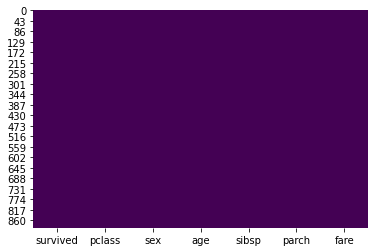

In [7]:
titanic.drop(['class','adult_male','who','embarked','deck', 'embark_town', 'alive', 'alone'], axis=1,inplace=True)
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis")

In [8]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])

In [9]:
titanic['age'] = titanic['age'].astype('int')
titanic['fare'] = titanic['fare'].astype('int')

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  891 non-null    int64
 1   pclass    891 non-null    int64
 2   sex       891 non-null    int64
 3   age       891 non-null    int64
 4   sibsp     891 non-null    int64
 5   parch     891 non-null    int64
 6   fare      891 non-null    int64
dtypes: int64(7)
memory usage: 55.7 KB


### Separar la data

In [11]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Aplicación de Linear Regression: ***45.52%***

In [12]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = linear.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print('Accuracy Linear Regression: '+ str(accuracy*100))

Accuracy Linear Regression: 45.52770739807052


### Aplicación de Logistic Regression: ***82.71%***

In [14]:
logistic = LogisticRegression(solver='lbfgs', max_iter=400)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Logistic Regression: '+ str(accuracy*100))

Accuracy Logistic Regression: 82.71186440677965


### Aplicación de Decision Tree Classifier: ***82.37%***

In [16]:
max_depth_lista = list(range(1, 6))

accuracy = []

for depth in max_depth_lista:
  arbol = DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol.fit(X_train, y_train)
  score = arbol.score(X_test, y_test)
  accuracy.append(score)

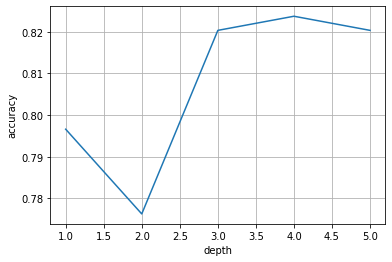

In [17]:
plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

In [18]:
arbol_classifier = DecisionTreeClassifier(max_depth=4, random_state=0)
arbol_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [19]:
y_pred = arbol_classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Decision Tree Classifier: '+ str(accuracy*100))

Accuracy Decision Tree Classifier: 82.37288135593221


### Aplicación de Decision Tree Regressor: ***11.51%***

In [20]:
arbol_regressor = DecisionTreeRegressor()
arbol_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
y_pred = arbol_regressor.predict(X_test) 
accuracy = r2_score(y_test, y_pred)
print('Accuracy Decicion Tree Regressor: '+ str(accuracy*100))

Accuracy Decicion Tree Regressor: 11.519638847341563


### Aplicación de Support Vector Machines: ***79.66%***

In [23]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_pred = svm.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Support Vector Machine: '+ str(accuracy*100))

Accuracy Support Vector Machine: 79.66101694915254


## Dataset Flor Iris

### Conocer y normalizar los datos

In [25]:
from sklearn.datasets import load_iris

data = load_iris()

In [26]:
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['target'] = data.target

In [27]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Separar la data

In [28]:
X = iris[data.feature_names]
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Aplicación de Linear Regression: ***94.87%***

In [29]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred = linear.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print('Accuracy Linear Regression: '+ str(accuracy*100))

Accuracy Linear Regression: 94.87283360348984


### Aplicación de Logistic Regression: ***100%***

In [31]:
lregression = LogisticRegression(solver='lbfgs', max_iter=400)
lregression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = lregression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Logistic Regression: '+ str(accuracy*100))

Accuracy Logistic Regression: 100.0


### Aplicación de Decision Tree Classifier: ***100%***

In [33]:
max_depth_lista = list(range(1, 6))

accuracy = []

for depth in max_depth_lista:
  arbol = DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol.fit(X_train, y_train)
  score = arbol.score(X_test, y_test)
  accuracy.append(score)

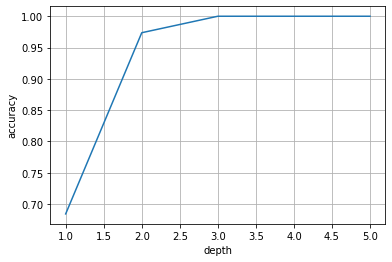

In [34]:
plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

In [35]:
arbol_classifier = DecisionTreeClassifier(max_depth=3, random_state=0)
arbol_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [36]:
y_pred = arbol_classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Decision Tree Classifier: '+ str(accuracy*100))

Accuracy Decision Tree Classifier: 100.0


### Aplicación de Decision Tree Regressor: ***100%***

In [37]:
arbol_regressor = DecisionTreeRegressor()
arbol_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
y_pred = arbol_regressor.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Decision Tree Regressor: '+ str(accuracy*100))

Accuracy Decision Tree Regressor: 100.0


### Aplicación de Support Vector Machine: ***100%***

In [39]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
y_pred = svm.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Support Vector Machine: '+ str(accuracy*100))

Accuracy Support Vector Machine: 100.0


## Dataset Oil consume

### Conocer y normalizat los datos

In [42]:
oil = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/petrol_consumption.csv", encoding='utf-8')

In [43]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gasolina_impuesto                     48 non-null     float64
 1   ingreso_promedio                      48 non-null     int64  
 2   carreteras_pavimentadas               48 non-null     int64  
 3   porcen_licencias_conducion_poblacion  48 non-null     float64
 4   gasolina_Consumo                      48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [44]:
oil['gasolina_impuesto'] = oil['gasolina_impuesto'].astype('int')
oil['porcen_licencias_conducion_poblacion'] = oil['porcen_licencias_conducion_poblacion'].astype('int')

In [45]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   gasolina_impuesto                     48 non-null     int64
 1   ingreso_promedio                      48 non-null     int64
 2   carreteras_pavimentadas               48 non-null     int64
 3   porcen_licencias_conducion_poblacion  48 non-null     int64
 4   gasolina_Consumo                      48 non-null     int64
dtypes: int64(5)
memory usage: 2.0 KB


### Separar la data

In [78]:
X = oil['gasolina_impuesto'].to_numpy()
y = oil['gasolina_Consumo']

X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Aplicación de Linear Regression: ***15.78%***

In [79]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_pred = linear.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print('Accuracy Linear Regression: '+ str(accuracy*100))

Accuracy Linear Regression: 15.786893188124173


### Aplicación de Logistic Regression: ***0%***

In [81]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Logistic Regression: '+ str(accuracy*100))

Accuracy Logistic Regression: 0.0


### Aplicación de Decision Tree Classifier: ***0%***

In [83]:
max_depth_lista = list(range(1, 10))

accuracy = []

for depth in max_depth_lista:
  arbol = DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol.fit(X_train, y_train)
  score = arbol.score(X_test, y_test)
  accuracy.append(score)

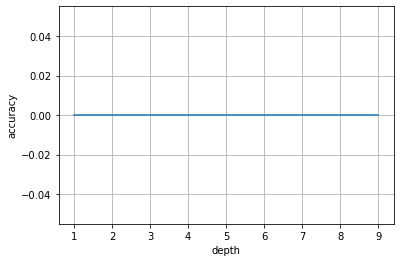

In [84]:
plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

In [85]:
arbol_classifier = DecisionTreeClassifier(max_depth=3, random_state=0)
arbol_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [86]:
y_pred = arbol_classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Decision Tree Classifier: '+ str(accuracy*100))

Accuracy Decision Tree Classifier: 0.0


### Aplicación de Decision Tree Regressor: ***36.72%***

In [87]:
arbol_regressor = DecisionTreeRegressor()
arbol_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [88]:
y_pred = arbol_regressor.predict(X_test) 
accuracy = r2_score(y_test, y_pred)
print('Accuracy Decicion Tree Regressor: '+ str(accuracy*100))

Accuracy Decicion Tree Regressor: 36.72480968787991


### Aplicación de Support Vector Machines: ***0%***

In [99]:
# {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
y_pred = svm.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy Support Vector Machine: '+ str(accuracy*100))

Accuracy Support Vector Machine: 0.0
